## Mitesh Kumar Chaudhary

### Exploratory Data Analysis - Indian Premier League

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [144]:
matches = pd.read_csv("matches.csv")

In [145]:
deliveries = pd.read_csv("deliveries.csv")

### Data Understanding

In [146]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [147]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Data Preparation

In [148]:
matches.drop(labels=["umpire1","umpire2","umpire3"],axis=1,inplace=True)

In [149]:
matches.drop(labels=["date"],axis=1,inplace=True)

### Data Visualization

#### Overall IPL

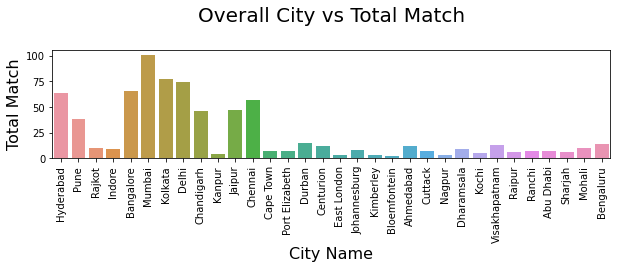

In [150]:
plt.figure(figsize=(10,2))
sns.countplot(x="city",data=matches)
plt.xticks(rotation=90)
plt.xlabel("City Name",fontsize=16)
plt.ylabel("Total Match",fontsize=16)
plt.title("Overall City vs Total Match\n",fontsize=20)
plt.show()

Mumbai Indian Wins Max Matches Followed by Chennai Super Kings


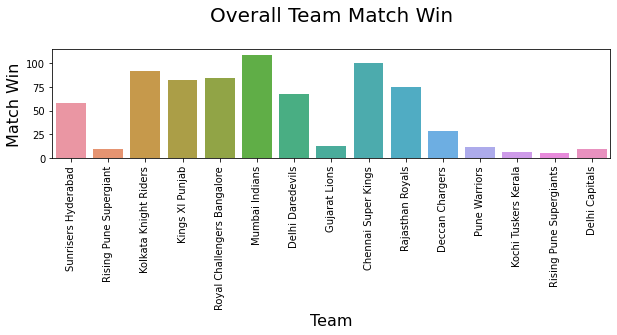

In [151]:
plt.figure(figsize=(10,2))
sns.countplot(x="winner",data=matches)
plt.xticks(rotation=90)
plt.xlabel("Team",fontsize=16)
plt.ylabel("Match Win",fontsize=16)
plt.title("Overall Team Match Win\n",fontsize=20)


print("Mumbai Indian Wins Max Matches Followed by Chennai Super Kings")
plt.show()

CH Gayle get maximum man of the match title followed by AD De Villiers and Dhoni


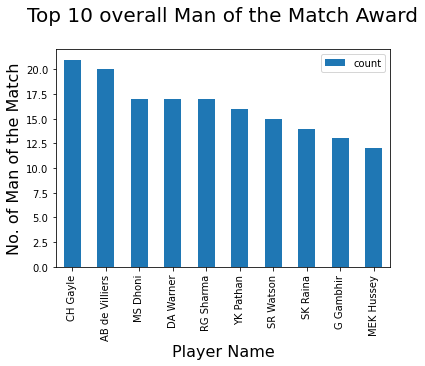

In [152]:
matches.groupby(by=["player_of_match"],as_index=False)["player_of_match"].agg(["count"]).sort_values(by="count",ascending=False).head(10).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Player Name",fontsize=16)
plt.ylabel("No. of Man of the Match",fontsize=16)
plt.title("Top 10 overall Man of the Match Award\n",fontsize=20)

print("CH Gayle get maximum man of the match title followed by AD De Villiers and Dhoni")
plt.show()

In [153]:
toss_won_match_won = matches[matches["toss_winner"]==matches["winner"]]["winner"].count()
toss_lose_match_won = matches[matches["toss_winner"]!=matches["winner"]]["winner"].count()

In [154]:
print("Total Matches                                     : ",matches.shape[0])
print("How many times team win Match who also win Toss   : ",toss_won_match_won)
print("How many times team win Match who also loose Toss : ",toss_lose_match_won)
print("No Result/Tie                                     : ",(matches.shape[0]-toss_won_match_won-toss_lose_match_won))

Total Matches                                     :  756
How many times team win Match who also win Toss   :  393
How many times team win Match who also loose Toss :  359
No Result/Tie                                     :  4


In [155]:
first_field_match_won = matches[matches["toss_decision"]=="field"]["winner"].count()
first_bat_match_won = matches[matches["toss_decision"]=="bat"]["winner"].count()

In [156]:
print("Total Matches                                     : ",matches.shape[0])
print("How many times team win Match who field first     : ",first_field_match_won)
print("How many times team win Match who bat first       : ",first_bat_match_won)
print("No Result/Tie                                     : ",(matches.shape[0]-first_field_match_won-first_bat_match_won))

Total Matches                                     :  756
How many times team win Match who field first     :  460
How many times team win Match who bat first       :  292
No Result/Tie                                     :  4


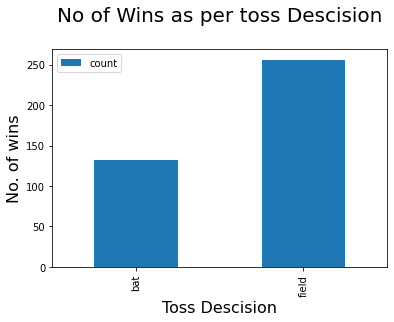

In [157]:
matches[(matches["toss_winner"]==matches["winner"])&(matches["result"]=="normal")].groupby(by=["toss_decision"])["toss_decision"].agg(["count"]).plot.bar()
plt.xlabel("Toss Descision",fontsize=16)
plt.ylabel("No. of wins",fontsize=16)
plt.title("No of Wins as per toss Descision\n",fontsize=20)
plt.show()

In [158]:
venue_result = matches[(matches["toss_winner"]==matches["winner"])&(matches["result"]=="normal")].groupby(by=["venue","toss_decision"],as_index=False)["winner"].count()

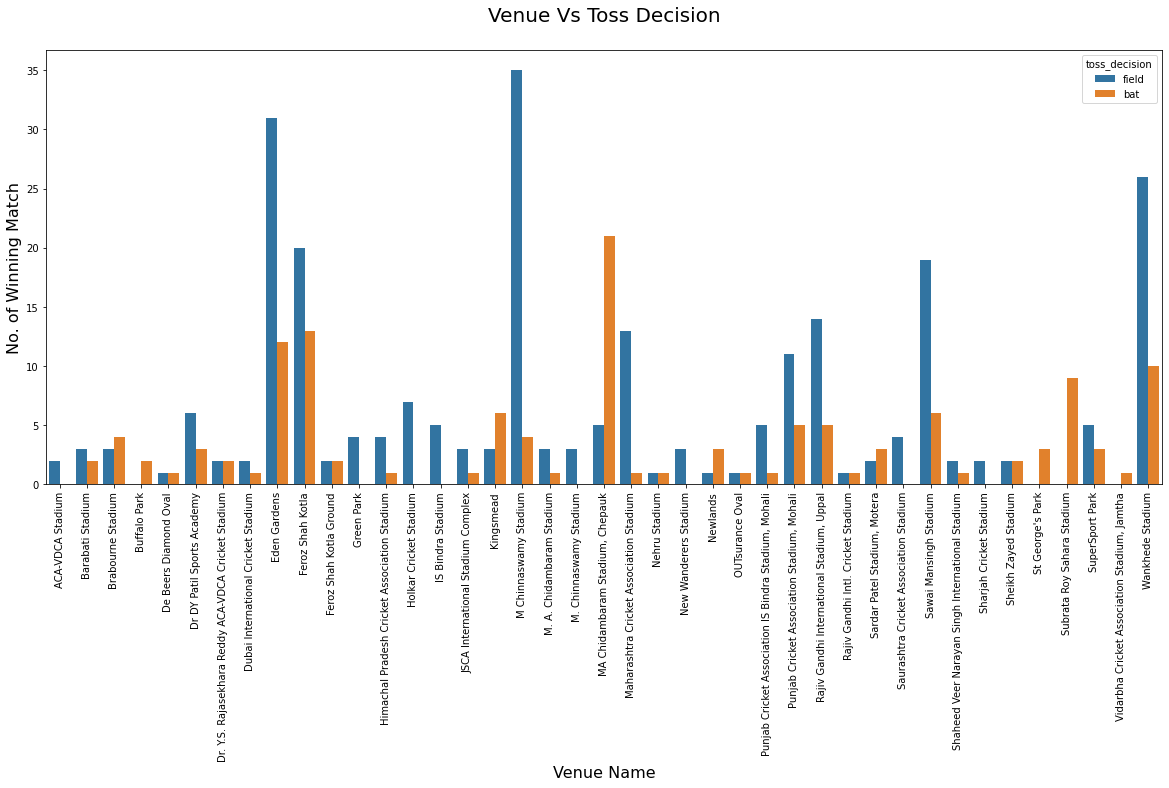

In [159]:
plt.figure(figsize=(20,8))
sns.barplot(x="venue",y="winner",hue="toss_decision",data=venue_result)
plt.xticks(rotation=90)
plt.xlabel("Venue Name",fontsize=16)
plt.ylabel("No. of Winning Match",fontsize=16)
plt.title("Venue Vs Toss Decision\n",fontsize=20)
plt.show()

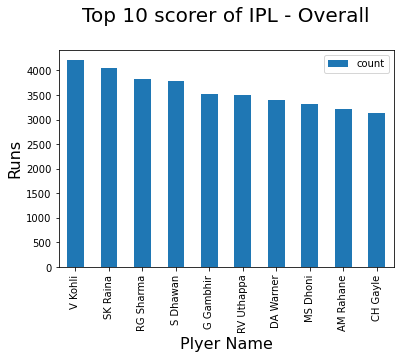

In [160]:
deliveries.groupby(by=["batsman"],as_index=False)["batsman_runs"].agg(["count"]).sort_values(by="count",ascending=False).head(10).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Plyer Name",fontsize=16)
plt.ylabel("Runs",fontsize=16)
plt.title("Top 10 scorer of IPL - Overall\n",fontsize=20)
plt.show()

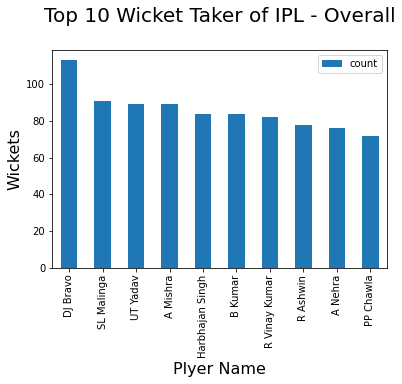

In [161]:
deliveries[deliveries["dismissal_kind"]==('caught' or 'bowled' or 'lbw' or 'caught and bowled' or 'stumped')].groupby(by=["bowler"],as_index=False)["batsman_runs"].agg(["count"]).sort_values(by="count",ascending=False).head(10).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Plyer Name",fontsize=16)
plt.ylabel("Wickets",fontsize=16)
plt.title("Top 10 Wicket Taker of IPL - Overall\n",fontsize=20)
plt.show()

In [162]:
runs = []
for i,j in enumerate(deliveries.iloc[:,10:18]):
    x = deliveries.loc[:,j].sum()
    runs.append(x)
runs

[6576, 884, 3785, 749, 10, 223286, 12004, 235290]

In [163]:
runs_df = pd.DataFrame({"runs by":deliveries.iloc[:,10:18].columns,"Runs":[6576, 884, 3785, 749, 10, 223286, 12004, 235290]})

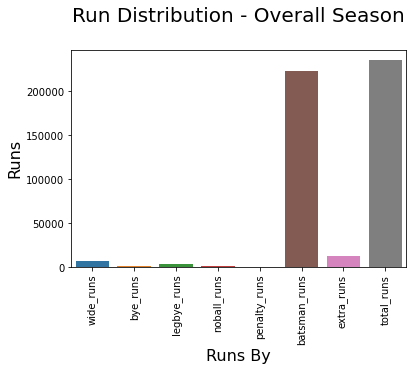

In [164]:
sns.barplot(x=runs_df["runs by"],y=runs_df["Runs"],data=runs_df)
plt.xticks(rotation=90)
plt.xlabel("Runs By",fontsize=16)
plt.ylabel("Runs",fontsize=16)
plt.title("Run Distribution - Overall Season\n",fontsize=20)
plt.show()

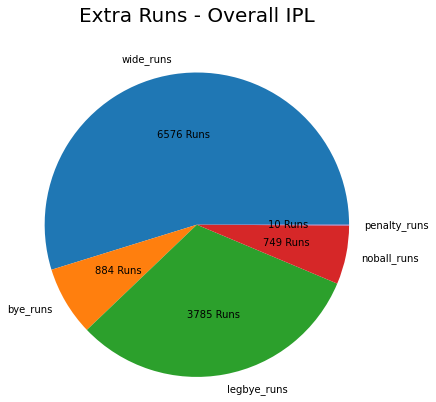

In [165]:
plt.pie(x=runs[0:5],labels=deliveries.iloc[:,10:15].columns,
        autopct=lambda p:f'{p*sum(runs[0:5])/100 :.0f} Runs',radius=1.75)
plt.title("Extra Runs - Overall IPL\n\n\n\n",fontsize=20)
plt.show()

In [373]:
inning_run = deliveries.groupby(by=["match_id"],as_index=False)["total_runs"].sum().sort_values(by="total_runs",ascending = False).head(20)

In [374]:
inning_run.reset_index(drop=True,inplace=True)

In [375]:
for i,j in enumerate(inning_run["match_id"]):
    team1 = matches[matches["id"]==j]["team1"].values[0]
    team2 = matches[matches["id"]==j]["team2"].values[0]
    inning_run.loc[i,"match_between"] = str("{} vs {}".format(team1,team2))

In [376]:
inning_run.head(2)

,match_id,total_runs,match_between
0,7937,471,Kolkata Knight Riders vs Kings XI Punjab
1,206,469,Chennai Super Kings vs Rajasthan Royals


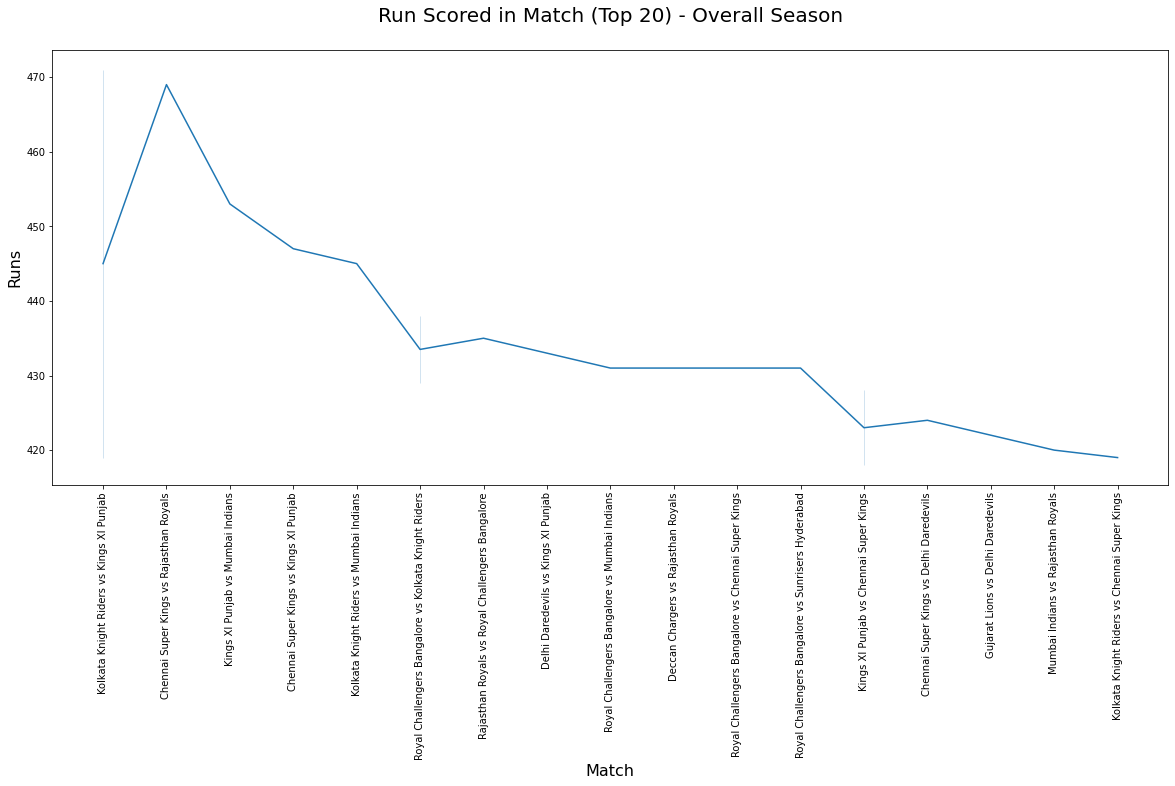

In [377]:
plt.figure(figsize=(20,8))
sns.lineplot(x="match_between",y="total_runs",data=inning_run)
plt.xticks(rotation=90)
plt.xlabel("Match",fontsize=16)
plt.ylabel("Runs",fontsize=16)
plt.title("Run Scored in Match (Top 20) - Overall Season\n",fontsize=20)
plt.show()

#### Season 2019

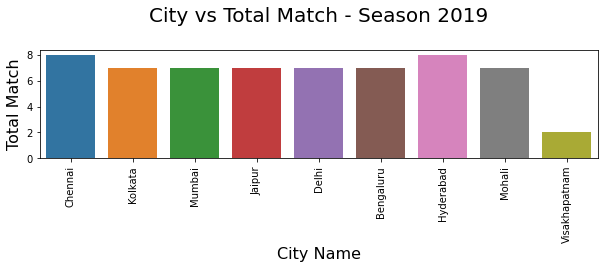

In [168]:
plt.figure(figsize=(10,2))
sns.countplot(x="city",data=matches[matches["season"]==2019])
plt.xticks(rotation=90)
plt.xlabel("City Name",fontsize=16)
plt.ylabel("Total Match",fontsize=16)
plt.title("City vs Total Match - Season 2019\n",fontsize=20)
plt.show()

Mumbai Indian Wins Max Matches Followed by Chennai Super Kings and Delhi Capital


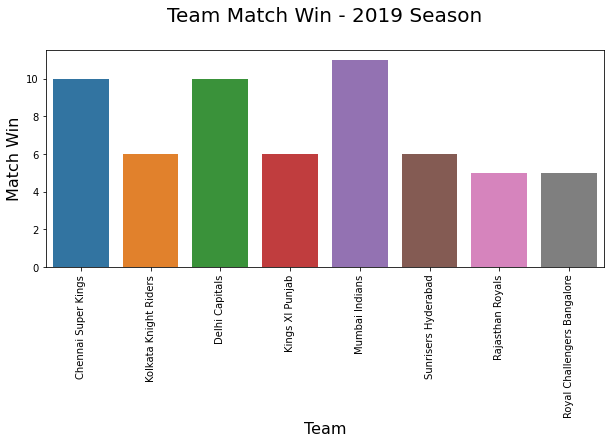

In [169]:
plt.figure(figsize=(10,4))
sns.countplot(x="winner",data=matches[matches["season"]==2019])
plt.xticks(rotation=90)
plt.xlabel("Team",fontsize=16)
plt.ylabel("Match Win",fontsize=16)
plt.title("Team Match Win - 2019 Season\n",fontsize=20)


print("Mumbai Indian Wins Max Matches Followed by Chennai Super Kings and Delhi Capital")
plt.show()

 AD De Villiers get maximum man of the match title followed by Bumrah,Dhoni,Pant and Pandya


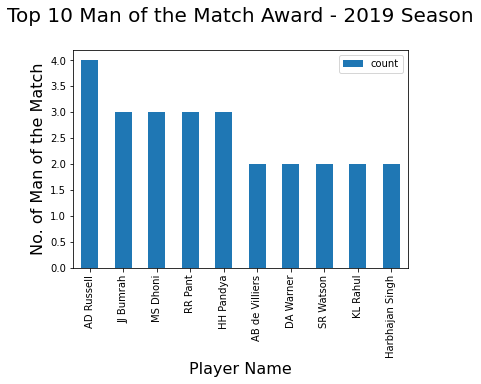

In [170]:
matches[matches["season"]==2019].groupby(by=["player_of_match"],as_index=False)["player_of_match"].agg(["count"]).sort_values(by="count",ascending=False).head(10).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Player Name",fontsize=16)
plt.ylabel("No. of Man of the Match",fontsize=16)
plt.title("Top 10 Man of the Match Award - 2019 Season\n",fontsize=20)

print(" AD De Villiers get maximum man of the match title followed by Bumrah,Dhoni,Pant and Pandya")
plt.show()

In [171]:
toss_won_match_won = matches[(matches["toss_winner"]==matches["winner"])&(matches["season"]==2019)]["winner"].count()
toss_lose_match_won = matches[(matches["toss_winner"]!=matches["winner"])&(matches["season"]==2019)]["winner"].count()

In [172]:
print("Total Matches                                     : ",matches[matches["season"]==2019].shape[0])
print("How many times team win Match who also win Toss   : ",toss_won_match_won)
print("How many times team win Match who also loose Toss : ",toss_lose_match_won)
print("No Result/Tie                                     : ",(matches[matches["season"]==2019].shape[0]-toss_won_match_won-toss_lose_match_won))

Total Matches                                     :  60
How many times team win Match who also win Toss   :  36
How many times team win Match who also loose Toss :  23
No Result/Tie                                     :  1


In [173]:
first_field_match_won = matches[(matches["toss_decision"]=="field")&(matches["season"]==2019)]["winner"].count()
first_bat_match_won = matches[(matches["toss_decision"]=="bat")&(matches["season"]==2019)]["winner"].count()

In [174]:
print("Total Matches                                     : ",matches[matches["season"]==2019].shape[0])
print("How many times team win Match who field first     : ",first_field_match_won)
print("How many times team win Match who bat first       : ",first_bat_match_won)
print("No Result/Tie                                     : ",(matches[matches["season"]==2019].shape[0]-first_field_match_won-first_bat_match_won))

Total Matches                                     :  60
How many times team win Match who field first     :  49
How many times team win Match who bat first       :  10
No Result/Tie                                     :  1


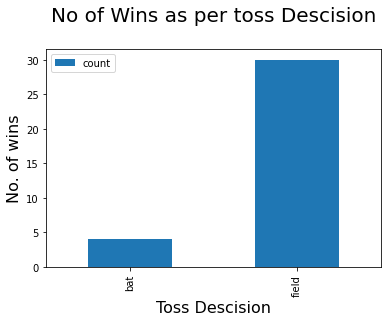

In [175]:
matches[(matches["toss_winner"]==matches["winner"])&(matches["result"]=="normal")&(matches["season"]==2019)].groupby(by=["toss_decision"])["toss_decision"].agg(["count"]).plot.bar()
plt.xlabel("Toss Descision",fontsize=16)
plt.ylabel("No. of wins",fontsize=16)
plt.title("No of Wins as per toss Descision\n",fontsize=20)
plt.show()

In [176]:
venue_result = matches[(matches["toss_winner"]==matches["winner"])&(matches["result"]=="normal")&(matches["season"]==2019)].groupby(by=["venue","toss_decision"],as_index=False)["winner"].count()

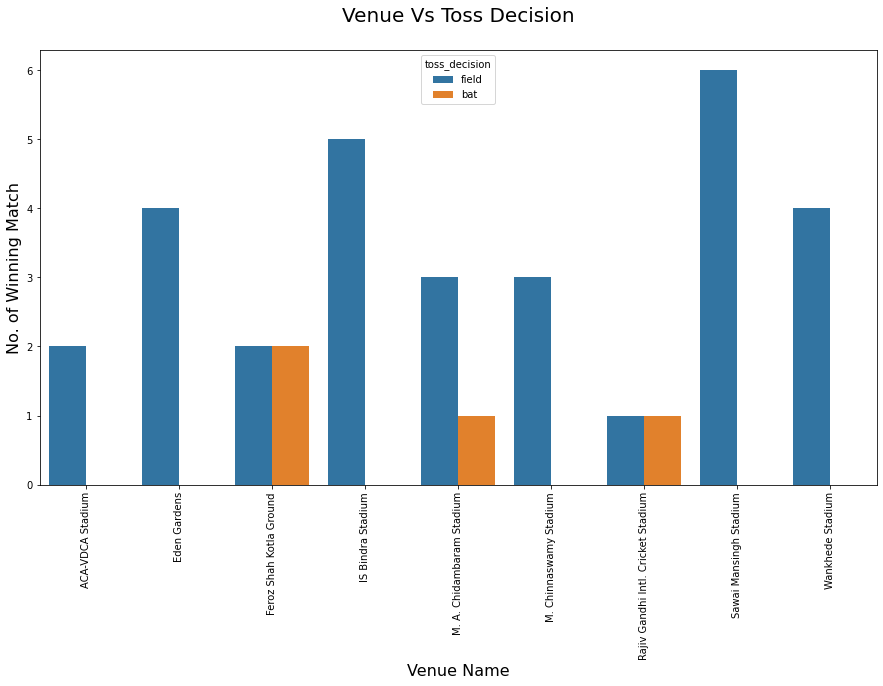

In [177]:
plt.figure(figsize=(15,8))
sns.barplot(x="venue",y="winner",hue="toss_decision",data=venue_result)
plt.xticks(rotation=90)
plt.xlabel("Venue Name",fontsize=16)
plt.ylabel("No. of Winning Match",fontsize=16)
plt.title("Venue Vs Toss Decision\n",fontsize=20)
plt.show()

In [178]:
matches[matches["season"]==2019]["id"].head()

696    11137
697    11138
698    11139
699    11140
700    11141
Name: id, dtype: int64

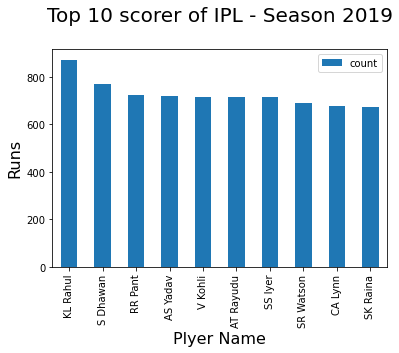

In [179]:
deliveries[deliveries["match_id"]>1136].groupby(by=["batsman"],as_index=False)["batsman_runs"].agg(["count"]).sort_values(by="count",ascending=False).head(10).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Plyer Name",fontsize=16)
plt.ylabel("Runs",fontsize=16)
plt.title("Top 10 scorer of IPL - Season 2019\n",fontsize=20)
plt.show()

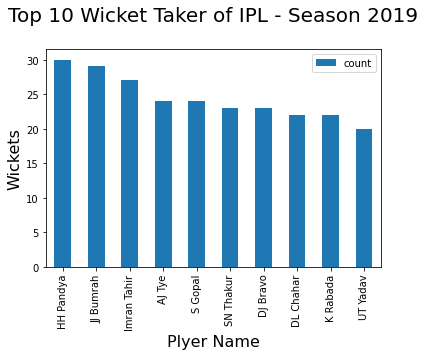

In [385]:
deliveries[(deliveries["match_id"]>1136)&(deliveries["dismissal_kind"]==('caught' or 'bowled' or 'lbw' or 'caught and bowled' or 'stumped'))].groupby(by=["bowler"],as_index=False)["batsman_runs"].agg(["count"]).sort_values(by="count",ascending=False).head(10).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Plyer Name",fontsize=16)
plt.ylabel("Wickets",fontsize=16)
plt.title("Top 10 Wicket Taker of IPL - Season 2019\n",fontsize=20)
plt.show()

In [181]:
runs = []
for i,j in enumerate(deliveries[(deliveries["match_id"]>1136)].iloc[:,10:18]):
    x = deliveries[(deliveries["match_id"]>1136)].loc[:,j].sum()
    runs.append(x)
runs[0:]

[934, 149, 440, 96, 0, 39357, 1619, 40976]

In [182]:
runs_df = pd.DataFrame({"runs by":deliveries.iloc[:,10:18].columns,"Runs":[934, 149, 440, 96, 0, 39357, 1619, 40976]})

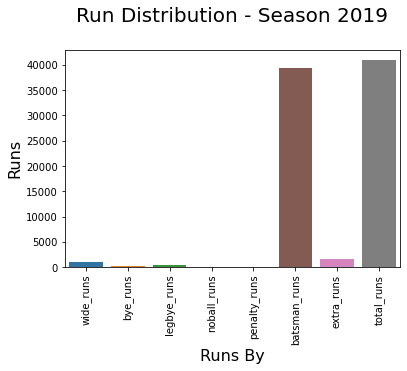

In [183]:
sns.barplot(x=runs_df["runs by"],y=runs_df["Runs"],data=runs_df)
plt.xticks(rotation=90)
plt.xlabel("Runs By",fontsize=16)
plt.ylabel("Runs",fontsize=16)
plt.title("Run Distribution - Season 2019\n",fontsize=20)
plt.show()

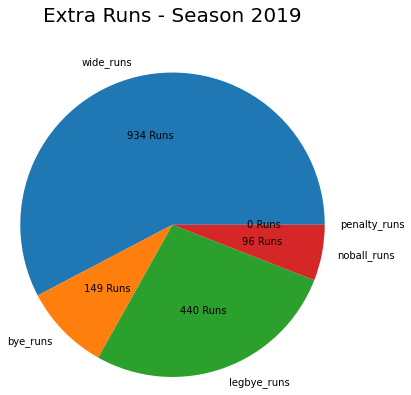

In [184]:
plt.pie(x=runs[0:5],labels=deliveries.iloc[:,10:15].columns,
        autopct=lambda p:f'{p*sum(runs[0:5])/100 :.0f} Runs',radius=1.75)
plt.title("Extra Runs - Season 2019\n\n\n\n",fontsize=20)
plt.show()

In [185]:
KL_runs = deliveries[(deliveries["match_id"]>1136)&(deliveries["batsman"]=="KL Rahul")].groupby(by=["batsman_runs"],as_index=False)["batsman_runs"].sum()

KL Rahul Total Score in IPL Season 2019 :  1288


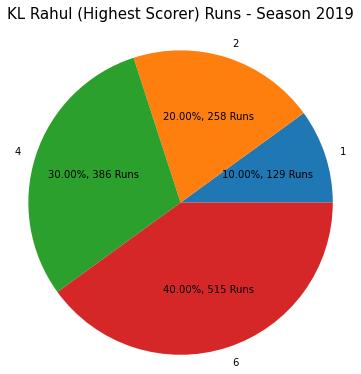

In [186]:
plt.pie(x=KL_runs.index[1:],data=KL_runs,labels=['1','2','4','6'],autopct=lambda p:f'{p:.2f}%, {p*sum(KL_runs.batsman_runs)/100 :.0f} Runs',radius=1.75)
plt.xticks(rotation=90)
plt.title("KL Rahul (Highest Scorer) Runs - Season 2019\n\n\n\n",fontsize=15)


print("KL Rahul Total Score in IPL Season 2019 : ",deliveries[(deliveries["match_id"]>1136)&(deliveries["batsman"]=="KL Rahul")]["batsman_runs"].sum())
plt.show()

In [378]:
inning_run = deliveries[(deliveries["match_id"]>1136)].groupby(by=["match_id"],as_index=False)["total_runs"].sum().sort_values(by="total_runs",ascending = False).head(20)

In [379]:
inning_run.reset_index(drop=True,inplace=True)

In [380]:
for i,j in enumerate(inning_run["match_id"]):
    team1 = matches[matches["id"]==j]["team1"].values[0]
    team2 = matches[matches["id"]==j]["team2"].values[0]
    inning_run.loc[i,"match_between"] = str("{} vs {}".format(team1,team2))

In [381]:
inning_run.head(2)

,match_id,total_runs,match_between
0,7937,471,Kolkata Knight Riders vs Kings XI Punjab
1,11338,445,Kolkata Knight Riders vs Mumbai Indians


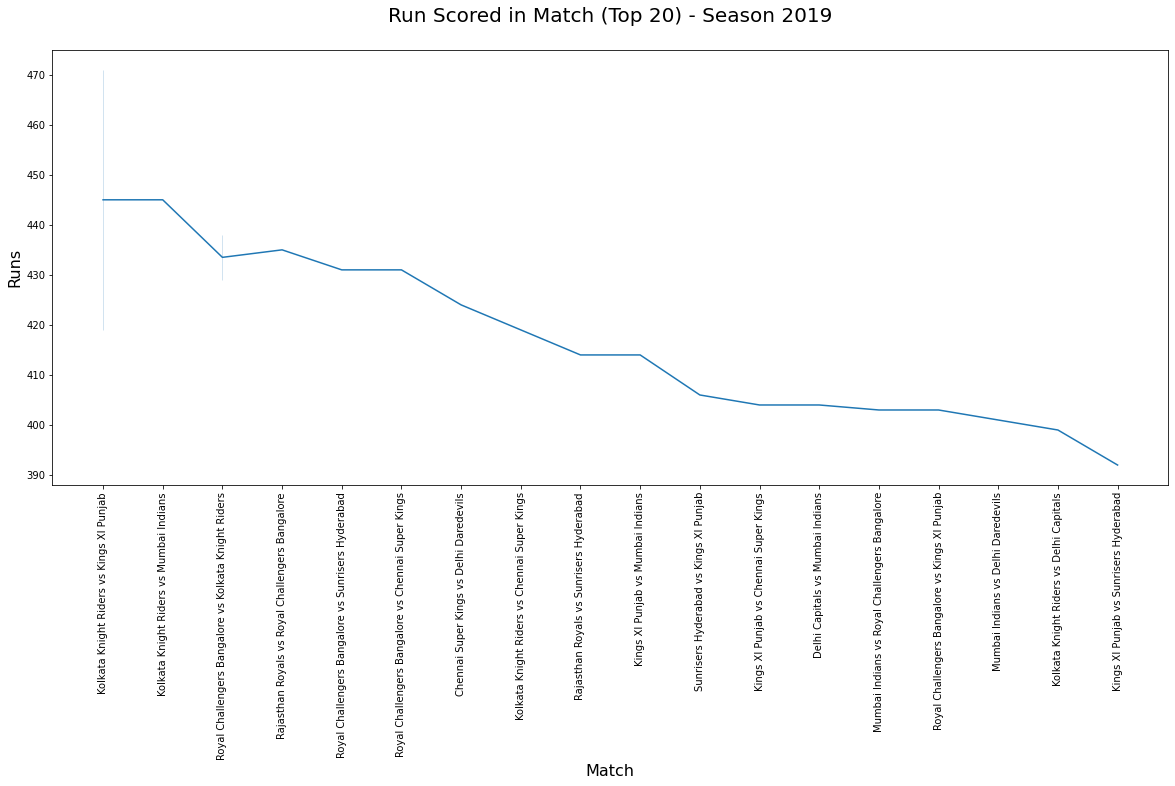

In [382]:
plt.figure(figsize=(20,8))
sns.lineplot(x="match_between",y="total_runs",data=inning_run)
plt.xticks(rotation=90)
plt.xlabel("Match",fontsize=16)
plt.ylabel("Runs",fontsize=16)
plt.title("Run Scored in Match (Top 20) - Season 2019\n",fontsize=20)
plt.show()